In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [3]:
import splitfolders

In [84]:
actions = ['left', 'shoot', 'right']
action_label = {actions:i for i, actions in enumerate(actions)}
IMAGE_SIZE = (200, 150)

In [85]:
input_folder = "C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/images"

output_folder = "C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/dataset"

model_path = "C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model"

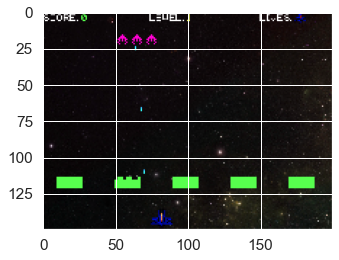

In [86]:
array1 = np.load("C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/file1.txt.npy")
plt.imshow(array1)

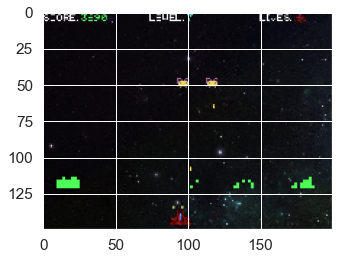

In [87]:
plt.imshow(train_images[0])

In [88]:
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 1417 files [00:01, 874.89 files/s] 


In [89]:
def load_dataset():
    
    datasets = [output_folder+"/train", output_folder+"/test"]
    output = []
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):
            label = action_label[folder]
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                images.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(dataset, folder, file)),cv2.COLOR_BGR2RGB), IMAGE_SIZE) )
                labels.append(label)
        images = np.array(images)
        labels = np.array(labels)
        
        output.append((images, labels))
        
    return output

In [90]:
(train_images, train_labels), (test_images, test_labels) = load_dataset()

Loading C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/dataset/train


100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:01<00:00, 93.58it/s]


Loading C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/dataset/test


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 94.63it/s]


In [91]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [92]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [93]:
def display_random_image(actions, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + actions[labels[index]])
    plt.show()

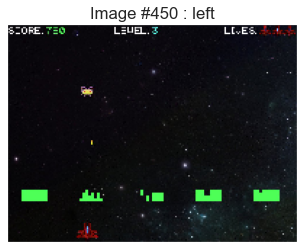

In [94]:
display_random_image(actions, train_images, train_labels)

In [95]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 200, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [96]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
action_label

{'left': 0, 'shoot': 1, 'right': 2}

In [101]:
array = np.reshape(cv2.resize(cv2.cvtColor(cv2.imread(output_folder+"/train/left/screenshot4304.jpg"),cv2.COLOR_BGR2RGB), IMAGE_SIZE), [1,150,200,3])

array.shape

(1, 150, 200, 3)

In [102]:
train_images.shape

(1133, 150, 200, 3)

In [103]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
8/8 [==============================] - 9s 1s/step - loss: 2.0095 - accuracy: 0.3024 - val_loss: 1.2718 - val_accuracy: 0.4273
Epoch 2/20
8/8 [==============================] - 8s 987ms/step - loss: 1.2258 - accuracy: 0.4592 - val_loss: 1.1610 - val_accuracy: 0.4317
Epoch 3/20
8/8 [==============================] - 8s 990ms/step - loss: 1.0543 - accuracy: 0.4658 - val_loss: 1.0525 - val_accuracy: 0.4361
Epoch 4/20
8/8 [==============================] - 8s 994ms/step - loss: 0.9478 - accuracy: 0.5132 - val_loss: 0.9902 - val_accuracy: 0.4714
Epoch 5/20
8/8 [==============================] - 8s 991ms/step - loss: 0.8709 - accuracy: 0.5971 - val_loss: 0.9492 - val_accuracy: 0.5154
Epoch 6/20
8/8 [==============================] - 8s 993ms/step - loss: 0.7932 - accuracy: 0.6468 - val_loss: 0.9748 - val_accuracy: 0.4934
Epoch 7/20
8/8 [==============================] - 8s 986ms/step - loss: 0.7216 - accuracy: 0.6600 - val_loss: 0.9044 - val_accuracy: 0.5551
Epoch 8/20
8/8 [=======

In [104]:
model.save(model_path)

INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model\assets


INFO:tensorflow:Assets written to: C:/Users/ammaR/Desktop/CSC496 Project/gameProject/PythonApplication1/model\assets


In [105]:
pred = model.predict(test_images)

5/5 [==============================] - 0s 51ms/step


In [106]:
pred_labels = np.argmax(pred, axis=1)

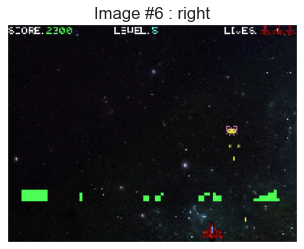

In [109]:
display_random_image(actions, test_images, pred_labels)

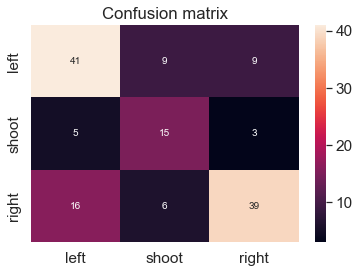

In [110]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=actions, 
           yticklabels=actions, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [78]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [79]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

5/5 [==============================] - 5s 918ms/step


In [80]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [81]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X)
C1 = C[:,0]
C2 = C[:,1]

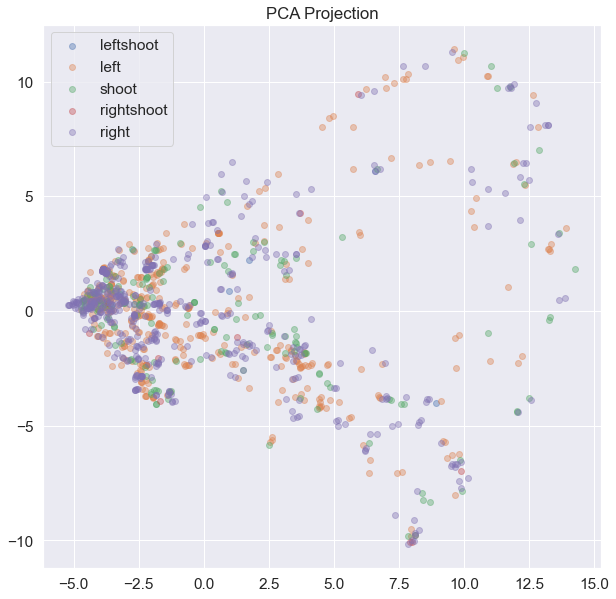

In [83]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(actions):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()